In [4]:
import statsmodels.api as sm 
import numpy as np 
import plotly.graph_objs as go 
import matplotlib.pyplot as plt 
import plotly
import warnings
warnings.filterwarnings('ignore')


In [5]:
n_assets=5
n_simulation=500


In [6]:
returns=np.random.randn(n_assets, n_simulation)


In [8]:
rand=np.random.rand(n_assets)
weights=rand/sum(rand)

def port_return(returns):
    rets=np.mean(returns, axis=1)
    cov=np.cov(rets.T, aweights=weights,ddof=1)
    portfolio_returns=np.dot(weights, rets.T)
    portfolio_std_dev=np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_std_dev

In [9]:
portfolio_returns, portfolio_std_dev=port_return(returns)


In [10]:
print(portfolio_returns)
print(portfolio_std_dev)

0.018052648983267885
0.0176851834787762


In [11]:
portfolio=np.array([port_return(np.random.randn(n_assets, i))
for i in range(1,101)])

In [12]:
best_fit=sm.OLS(portfolio[:,1], sm.add_constant(portfolio[:,0]))\
    .fit().fittedvalues

In [15]:
fig=go.Figure()
fig.add_trace(go.Scatter(name='Risk-Return Relationship',
x=portfolio[:,0],
y=portfolio[:,1], mode='markers'))
fig.add_trace(go.Scatter(name='Best Fit Line',
x=portfolio[:,0],
y=best_fit, mode='lines'))
fig.update_layout(xaxis_title='Return',
yaxis_title='Standard Deviation',
width=900, height=470)
fig.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


In [17]:
def utility(x):
    return(np.exp(x**gamma))

In [18]:
pi=np.random.uniform(0,1,20)
pi=np.sort(pi)

In [19]:
print('The highest three probability of losses ar {}'
.format(pi[-3:]))


The highest three probability of losses ar [0.9613607  0.96531056 0.99142351]


In [20]:
y=2
c=1.5
Q=5
D=0.01
gamma=0.4

In [21]:
def supply(Q):
    return(np.mean(pi[-Q:])*c)

In [22]:
def demand(D):
    return(np.sum(utility(y-D)>pi*utility(y-c)+(1-pi)*utility(y)))

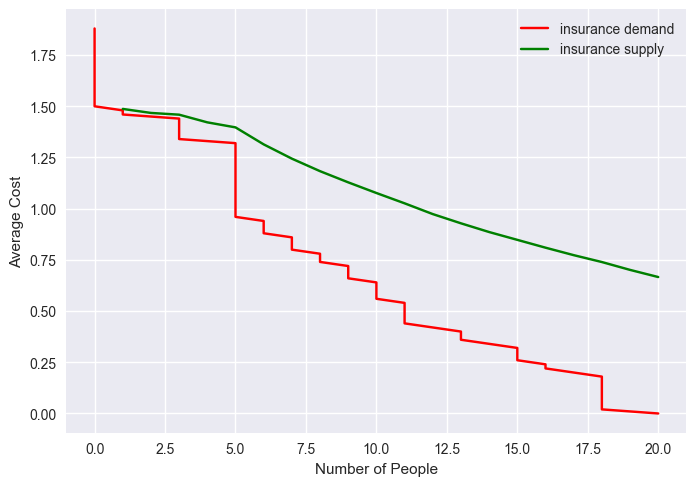

In [23]:
plt.figure()
plt.plot([demand(i) for i in np.arange(0,1.9,0.02)],
np.arange(0,1.9,0.02),
'r', label='insurance demand')
plt.plot(range(1,21),[supply(j)for j in range(1,21)],
'g', label='insurance supply')
plt.ylabel('Average Cost')
plt.xlabel('Number of People')
plt.legend()
plt.show()